# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     682.1
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           4.03e-38
Time:                        14:34:37   Log-Likelihood:                -6.5765
No. Observations:                  50   AIC:                             21.15
Df Residuals:                      46   BIC:                             28.80
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9913      0.098     50.895      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.48211748  4.97444944  5.42589973  5.80797503  6.10246509  6.30443467
  6.42303434  6.4799971   6.5060677   6.53595137  6.60261182  6.73185545
  6.93809138  7.22196408  7.57024754  7.95801817  8.35274978  8.71965745
  9.02741266  9.25329043  9.38690302  9.43190654  9.40540034  9.33511755
  9.25486868  9.19898662  9.19668581  9.26726246  9.41692418  9.6377701
  9.90908897 10.20076197 10.47821113 10.70808037 10.86371587 10.92954517
 10.90363568 10.79801223 10.63668141 10.45168733 10.27784692 10.14702953
 10.08292097 10.09713194 10.18729043 10.33743146 10.52062008 10.70337667
 10.85117758 10.93412726]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.9185763  10.76524195 10.4946273  10.15345634  9.80323423  9.50518875
  9.3052796   9.22294581  9.24634647  9.33525971]


## Plot comparison

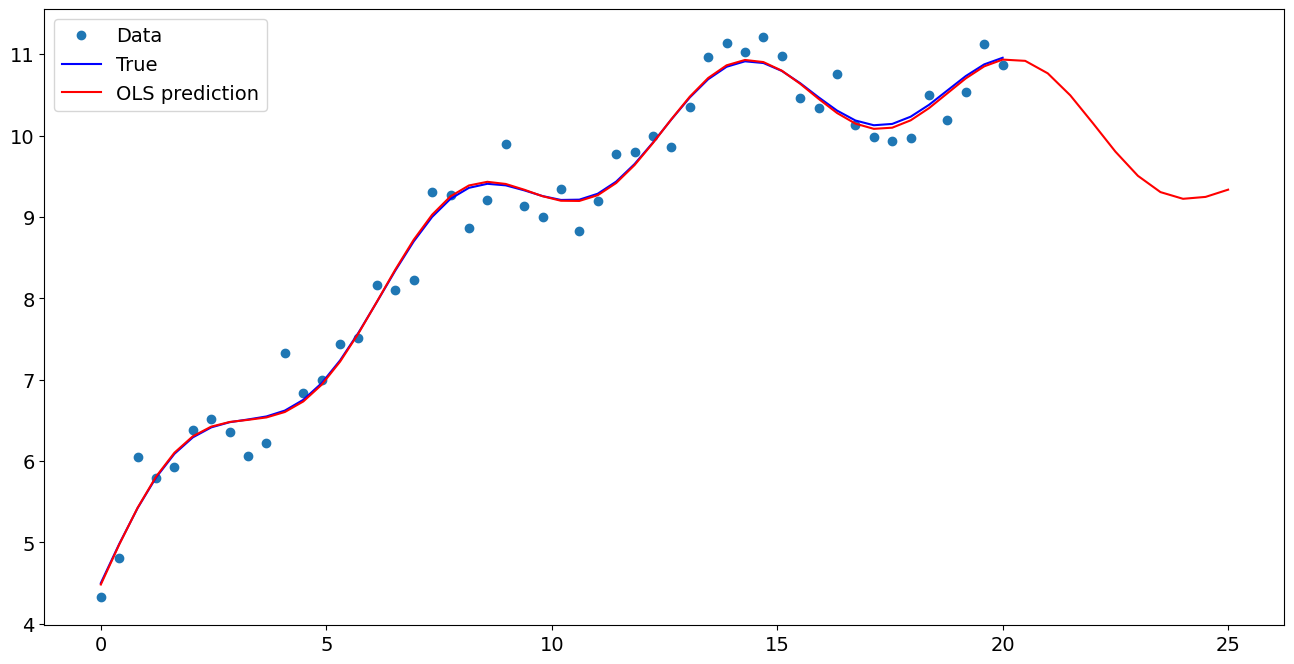

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.991325
x1                  0.502418
np.sin(x1)          0.522822
I((x1 - 5) ** 2)   -0.020368
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.918576
1    10.765242
2    10.494627
3    10.153456
4     9.803234
5     9.505189
6     9.305280
7     9.222946
8     9.246346
9     9.335260
dtype: float64